# Practica Machine Learning
### Bernardo Koron
Se realizara un modelo de regresion para predecir el precio de los departamentos publicados en Airbnb.

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline


### Carga y preparacion de datos, division en train-test.

In [2]:
data_full = pd.read_csv("./airbnb-listings-extract.csv", sep = ';')

print(f'\nTotal number of rows: {len(data_full)}')



Total number of rows: 14780


In [3]:
# Keep only the aparments from Madrid
data_full = data_full[data_full["City"]=="Madrid"]
print(f'Inputs placed in Madrid: {len(data_full)}')

Inputs placed in Madrid: 13207


In [4]:
# Train and test separation
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_full, test_size=.2, random_state = 1)

print('Datos de entrenamiento: ', train.shape)
print('Datos de test: ', test.shape)

train.to_csv('./train.csv', sep=';', index=False)
test.to_csv('./test.csv',sep=';', index=False)

Datos de entrenamiento:  (10565, 89)
Datos de test:  (2642, 89)


In [5]:
# Read train data from .csv file
data_train = pd.read_csv('./train.csv', sep=';')
pd.set_option('display.max_rows', 90)
data_train.head(5).T

/tmp/ipykernel_72598/1940423293.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('./train.csv', sep=';')


,0,1,2,3,4
ID,3895070,1162707,14495975,1534472,16446427
Listing Url,https://www.airbnb.com/rooms/3895070,https://www.airbnb.com/rooms/1162707,https://www.airbnb.com/rooms/14495975,https://www.airbnb.com/rooms/1534472,https://www.airbnb.com/rooms/16446427
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Great Apartment in Center Madrid VT 1692,NICE & BIG DOUBLE ROOM AT DOWNTOWN,Escala Suites Chalet,Habitación disponible para chic@s,MADRID.private room.4beds.centric
Summary,Our beautiful apartment is located in the most...,NaN,Te va a encantar mi lugar debido a el espacio ...,Habitación acogedora luminosa y con un gran ar...,Habitación cuádruple privada en El Centro de M...
Space,"The house has been fully remodeled in 2014, he...",We are a young couple; David (Spain) and Ana (...,NaN,Habitación confortable individual o doble con ...,NaN
Description,Our beautiful apartment is located in the most...,We are a young couple; David (Spain) and Ana (...,Te va a encantar mi lugar debido a el espacio ...,Habitación acogedora luminosa y con un gran ar...,Habitación cuádruple privada en El Centro de M...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,You will be very close to the nightlife of thi...,NaN,NaN,"Barrio tranquilo, con todo cerca, farmacia, su...",NaN


In [6]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10565.0,1.036339e+07,5.520115e+06,1.862800e+04,5.794968e+06,1.150865e+07,1.532562e+07,1.810984e+07
Scrape ID,10565.0,2.017041e+13,4.336143e+00,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Host ID,10565.0,3.717077e+07,3.428812e+07,1.745300e+04,7.522311e+06,2.709147e+07,5.722304e+07,1.247534e+08
Host Response Rate,9232.0,9.479452e+01,1.534421e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,10563.0,9.728581e+00,2.731454e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.650000e+02
Host Total Listings Count,10563.0,9.728581e+00,2.731454e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.650000e+02
Latitude,10565.0,4.042067e+01,2.018917e-02,4.033189e+01,4.041012e+01,4.041870e+01,4.042794e+01,4.051425e+01
Longitude,10565.0,-3.697004e+00,2.340780e-02,-3.835498e+00,-3.707730e+00,-3.701458e+00,-3.693677e+00,-3.573613e+00
Accommodates,10565.0,3.172835e+00,1.978501e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01


In [7]:
data_train.notnull().mean().mul(100).T

ID                                100.000000
Listing Url                       100.000000
Scrape ID                         100.000000
Last Scraped                      100.000000
Name                              100.000000
Summary                            96.242310
Space                              73.327023
Description                        99.962139
Experiences Offered               100.000000
Neighborhood Overview              62.697586
Notes                              37.889257
Transit                            62.423095
Access                             56.933270
Interaction                        56.933270
House Rules                        65.063890
Thumbnail Url                      81.258874
Medium Url                         81.258874
Picture Url                        99.858022
XL Picture Url                     81.258874
Host ID                           100.000000
Host URL                          100.000000
Host Name                          99.981070
Host Since

In [8]:
data_train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [9]:
# List of elements considered to be relevant
# We can see that "Square feet" has less than 4% of values so this column will not be added.
columns_to_keep = ['Price','Accommodates','Bathrooms','Bedrooms','Beds',
                   'Guests Included','Extra People','Review Scores Rating',
                   'Host Response Rate', 'Minimum Nights', 'Maximum Nights',
                   'Availability 30', 'Availability 60', 'Availability 90',
                   'Availability 365', 'Number of Reviews']
data_train = data_train[columns_to_keep]

In [10]:
# Check the percentage of missing values for each column
data_train.notnull().mean().mul(100).sort_values(ascending=False)

Accommodates            100.000000
Guests Included         100.000000
Extra People            100.000000
Minimum Nights          100.000000
Maximum Nights          100.000000
Availability 30         100.000000
Availability 60         100.000000
Availability 90         100.000000
Availability 365        100.000000
Number of Reviews       100.000000
Price                    99.943209
Bedrooms                 99.820161
Bathrooms                99.611926
Beds                     99.592996
Host Response Rate       87.382868
Review Scores Rating     78.296261
dtype: float64

In [11]:
# To check that all types are correct
data_train.dtypes

Price                   float64
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Host Response Rate      float64
Minimum Nights            int64
Maximum Nights            int64
Availability 30           int64
Availability 60           int64
Availability 90           int64
Availability 365          int64
Number of Reviews         int64
dtype: object

In [12]:
# imputation of missing values
def imputation(data):
    data["Price"].fillna(data_train["Price"].mean(), inplace=True)
    data["Bedrooms"].fillna(data_train["Bedrooms"].mode()[0], inplace=True)
    data["Bathrooms"].fillna(data_train["Bathrooms"].mode()[0], inplace=True)
    data["Beds"].fillna(data_train["Beds"].mode()[0], inplace=True)
    data["Host Response Rate"].fillna(data_train["Host Response Rate"].mean(), inplace=True)
    data["Review Scores Rating"].fillna(data_train["Review Scores Rating"].mean(), inplace=True)
    
imputation(data_train)

In [13]:
print(data_train.notnull().mean().mul(100).sort_values(ascending=False))
print(data_train.shape)

Price                   100.0
Accommodates            100.0
Bathrooms               100.0
Bedrooms                100.0
Beds                    100.0
Guests Included         100.0
Extra People            100.0
Review Scores Rating    100.0
Host Response Rate      100.0
Minimum Nights          100.0
Maximum Nights          100.0
Availability 30         100.0
Availability 60         100.0
Availability 90         100.0
Availability 365        100.0
Number of Reviews       100.0
dtype: float64
(10565, 16)


In [14]:
# Convert from pandas Data Frame to numpy array so it can be used by scikit-learn
data_train_np = data_train.values

y_train = data_train_np[:,0:1]     # The first column is Price
X_train = data_train_np[:,1:]      # All other columns

feature_names = data_train.columns[1:]

In [15]:
from sklearn import preprocessing

print('Datos entrenamiento: ', X_train.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

Datos entrenamiento:  (10565, 15)


In [16]:
# Test data
# Read test data from .csv file
data_test = pd.read_csv('./test.csv', sep=';')

data_test = data_test[columns_to_keep]

# Imputation of missing values using mean and mode from train
imputation(data_test)

# Convert from pandas Data Frame to numpy array so it can be used by scikit-learn
data_test_np = data_test.values

y_test = data_test_np[:,0:1]     # The first column is Price
X_test = data_test_np[:,1:]      # All other columns

# scale test data using scaler calculated with train data
XtestScaled = scaler.transform(X_test)

<div class="alert alert-block alert-success"> 
Modelo de regresion lineal utilizando Lasso con Cross Validation
</div> 

Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -1915.756
best parameters: {'alpha': 0.08685113737513521}


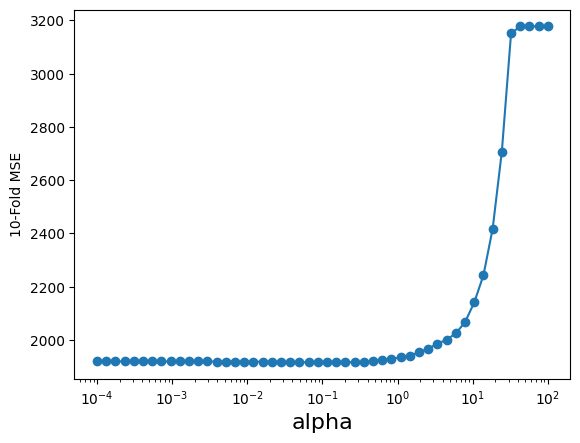

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-4,2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

MSE Modelo Lasso (train): 1.89e+03
RMSE Modelo Lasso (train): 43.5


In [19]:
# Lasso with test values
ytestLasso  = lasso.predict(XtestScaled)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (test) : 1.76e+03
RMSE Modelo Lasso (test) : 42


<div class="alert alert-block alert-success"> 
Ridge
</div>  

Fitting 10 folds for each of 50 candidates, totalling 500 fits
best mean cross-validation score: -1917.639
best parameters: {'alpha': 167.68329368110082}


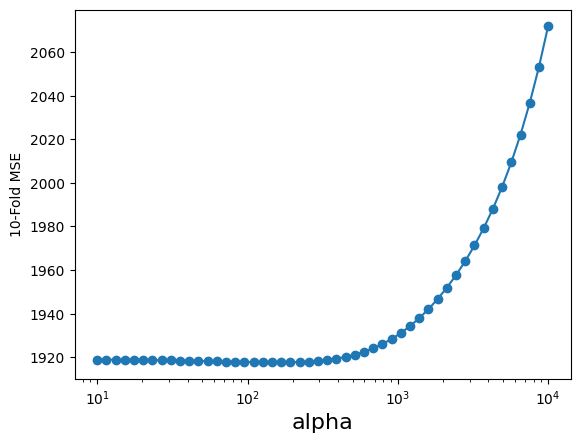

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(1,4,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=1) 
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [24]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainRidge = ridge.predict(XtrainScaled)
mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))


MSE Modelo Ridge (train): 1.89e+03
RMSE Modelo Ridge (train): 43.5


In [26]:
# Ridge with test values
ytestRidge  = ridge.predict(XtestScaled)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

MSE Modelo Ridge (test) : 1.76e+03
RMSE Modelo Ridge (test) : 42


<div class="alert alert-block alert-success"> Green box explample for later use </div> 

<div class="alert alert-block alert-danger"> Red box explample for later use </div> 